0       May
1       May
2       May
3       May
4       May
       ... 
1233    Nov
1234    Nov
1235    Nov
1236    Dec
1237    Dec
Name: month, Length: 1238, dtype: object


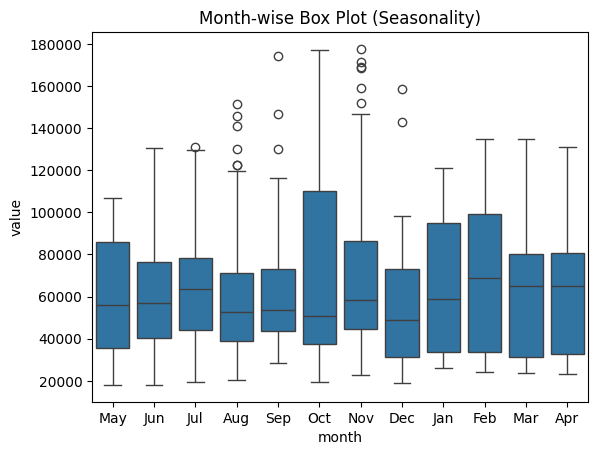

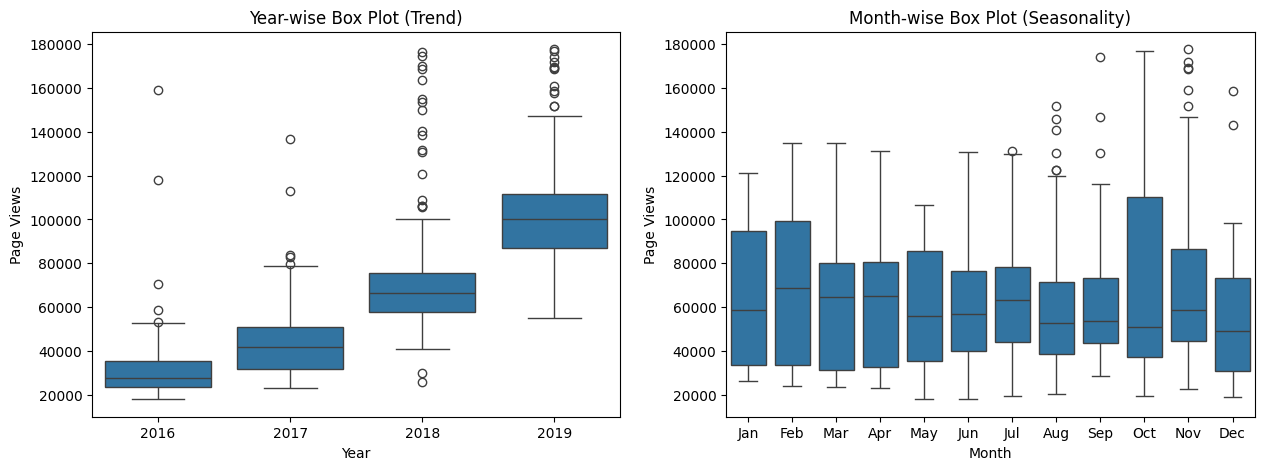

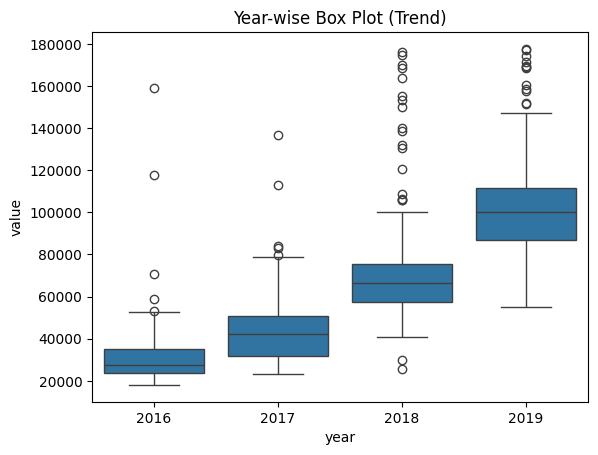

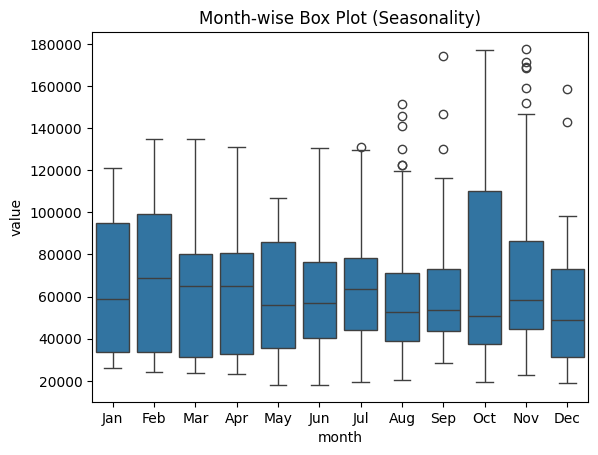

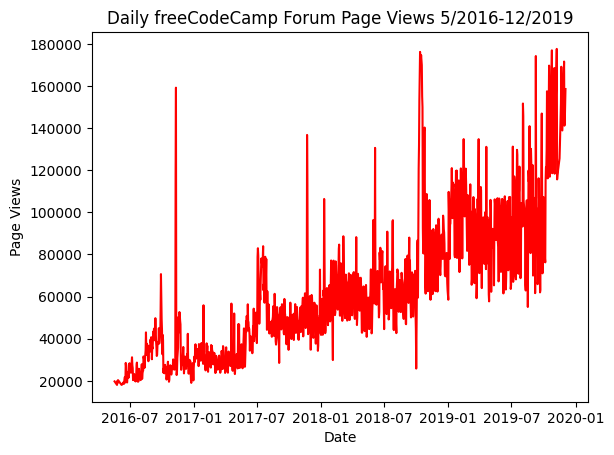

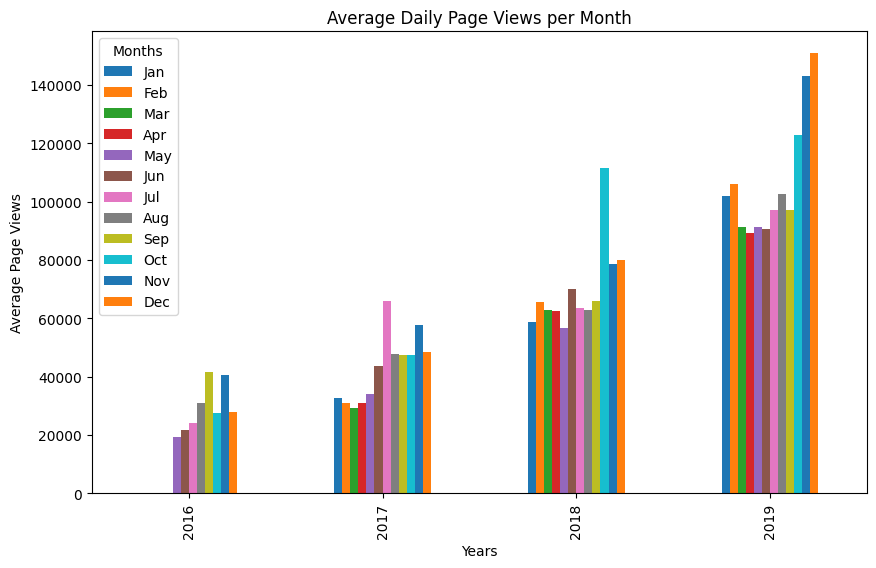

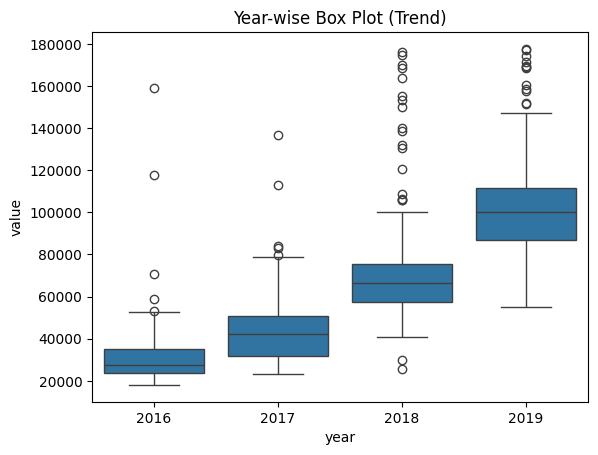

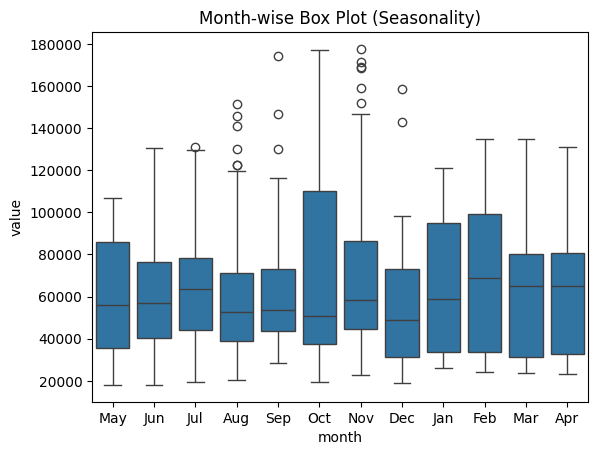

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')

# Clean data
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = df_box['date'].dt.year
df_box['month'] = df_box['date'].dt.strftime('%b')

# Order the months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_box['month'] = pd.Categorical(df_box['month'], categories=month_order, ordered=True)

# Create subplots with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Year-wise Box Plot (Trend)
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
ax1.set_title('Year-wise Box Plot (Trend)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

# Month-wise Box Plot (Seasonality)
sns.boxplot(data=df_box, x='month', y='value', ax=ax2)
ax2.set_title('Month-wise Box Plot (Seasonality)')
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

######

fig, ax = plt.subplots()  # Create a figure and an axes object
sns.boxplot(data=df_box, x='year', y='value', ax=ax)  # Plot on the axes
ax.set_title('Year-wise Box Plot (Trend)')  # Set the title using the axes object

# Create the second box plot (Month-wise)
fig, ax = plt.subplots()  # Create a new figure and axes
sns.boxplot(data=df_box, x='month', y='value', ax=ax)
ax.set_title('Month-wise Box Plot (Seasonality)')


# Save image and return fig
fig.savefig('box_plot.png')

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
print(df_box['month'])

def draw_line_plot():
  # Draw line plot
  fig = plt.figure()  # Create a figure object
  plt.plot(df.index, df['value'], 'r')
  plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
  plt.xlabel('Date')
  plt.ylabel('Page Views')
  # Save image and return fig (don't change this part)
  fig.savefig('line_plot.png')
  return fig


  #####################################
    # Plot
  fig, ax = plt.subplots(figsize=(10, 6))
  fig = df_bar.plt.bar(legend=True, figsize=(10,5), ylabel = 'Average Daily Page Views per Month', xlabels='Year').figure
   plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'  ])
  ax.set_title('Average Daily Page Views per Month')
  ax.set_xlabel('Years')
  ax.set_ylabel('Average Page Views')

def draw_bar_plot():
  # Copy and modify data for monthly bar plot
  df_bar = df.copy()
  df_bar['month'] = df_bar.index.month
  df_bar['year'] = df_bar.index.year
  df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()  # Pivot to have months as columns

  # Plot
  fig, ax = plt.subplots(figsize=(10, 6))
  df_bar.plot(kind='bar', stacked=False, ax=ax, legend=True) # This initiates the plotting process using the pandas plotting functionality, which is built on top of Matplotlib. It uses the data in the df_bar DataFrame.
  # stacked = False - Ensures that the bars for different categories (months in this case) are placed side-by-side and not stacked on top of each other.

  # Set title and labels
  ax.set_title('Average Daily Page Views per Month')
  ax.set_xlabel('Years')
  ax.set_ylabel('Average Page Views')

  # Set legend
  ax.legend(title='Months', labels=[
      'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
  ])

  # Save and show figure
  fig.savefig('bar_plot.png')
  return fig

    # Draw bar plot

    # Save image and return fig (don't change this part)

def draw_box_plot():
    # Prepare data for box plots (this part is done!)

    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, ax = plt.subplots()  # Create a figure and an axes object
    sns.boxplot(data=df_box, x='year', y='value', ax=ax)  # Plot on the axes
    ax.set_title('Year-wise Box Plot (Trend)')  # Set the title using the axes object

    # Create the second box plot (Month-wise)
    fig, ax = plt.subplots()  # Create a new figure and axes
    sns.boxplot(data=df_box, x='month', y='value', ax=ax)
    ax.set_title('Month-wise Box Plot (Seasonality)')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()